# Part 2a: Transient behaviour and current dependency

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tools import *

## Load data

In [13]:
data_dir = os.path.abspath('battery_experimental_data')
training_data_20 = pd.read_csv(os.path.join(data_dir, 'Model_Training_Data_20.csv'))
SOC_OCV_data = pd.read_csv(os.path.join(data_dir, 'SOC_OCV_MFCTT_2019.csv'), sep='\t')

display(training_data_20.head())

,Time (s),Current (A),Voltage (V)
0,0.000000,0.0,4.2
1,1.000005,0.0,4.2
2,1.999999,0.0,4.2
3,3.000004,0.0,4.2
4,3.999998,0.0,4.2


In [14]:
# extract values in numpy array
ref_SOC = SOC_OCV_data['SOC'].values                   # unit in %
ref_OCV = SOC_OCV_data['Ecell/V'].values               # unit in V

t = training_data_20['Time (s)'].values                # unit in s
I = training_data_20['Current (A)'].values             # unit in A
V_actual = training_data_20['Voltage (V)'].values      # unit in V

In [19]:
np.where(I==4)

(array([ 46852,  46853,  46854, ..., 519661, 519662, 519663], dtype=int64),)

## Splitting pulses

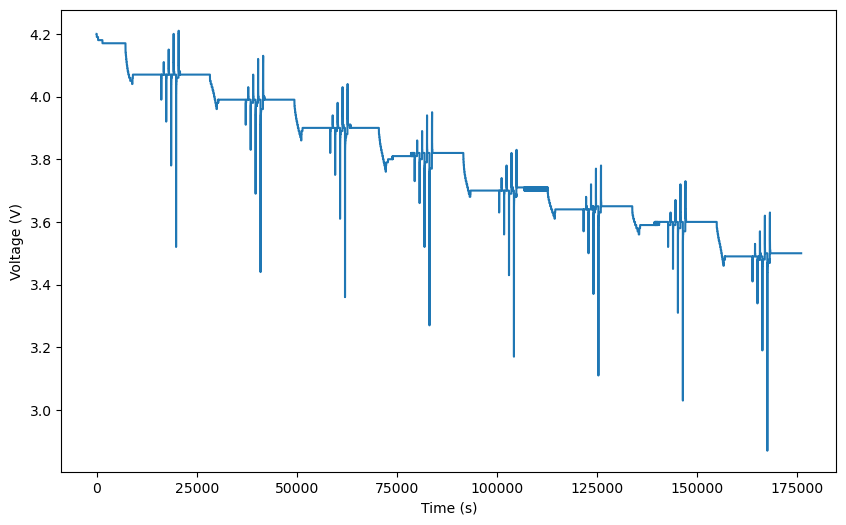

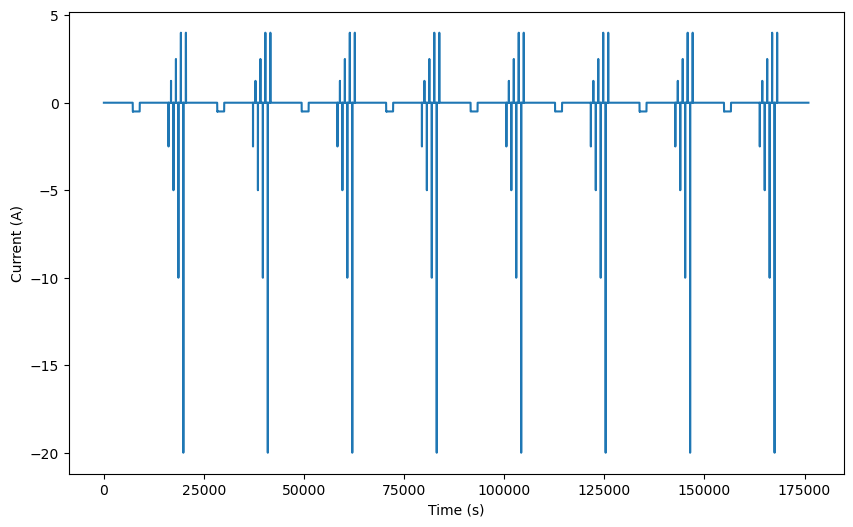

In [140]:
_, ax = plt.subplots(figsize=(10, 6))
ax.plot(t, V_actual)
# ax.set_xlim([0, t[-1]])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage (V)')

_, ax = plt.subplots(figsize=(10, 6))
ax.plot(t, I)
# ax.set_xlim([0, t[-1]])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Current (A)')

plt.show()

In [136]:
# shift to left by one index (now i is equivalent to i+1)
I_shifted = np.concatenate((I[1:], [0]))
idx_pulse_start = np.flatnonzero((I == 0) & (np.abs(I_shifted) > 1))
idx_pulse_end = np.flatnonzero((np.abs(I) > 1) & (I_shifted == 0)) + 1

# reshape to 8 x 8 matrix, where rows correspond to each SOC value and
#                                cols correspond to each pulse with different current
idx_pulse_start = idx_pulse_start.reshape(8, 8)
idx_pulse_end = idx_pulse_end.reshape(8, 8)
# print(idx_pulse_start)
# print(idx_pulse_end)

to get the starting positions for all SOC values:

idx_pulse_start[:, 0]

## A bit visulisation (not part of the answer):

For each SOC value, we will have:

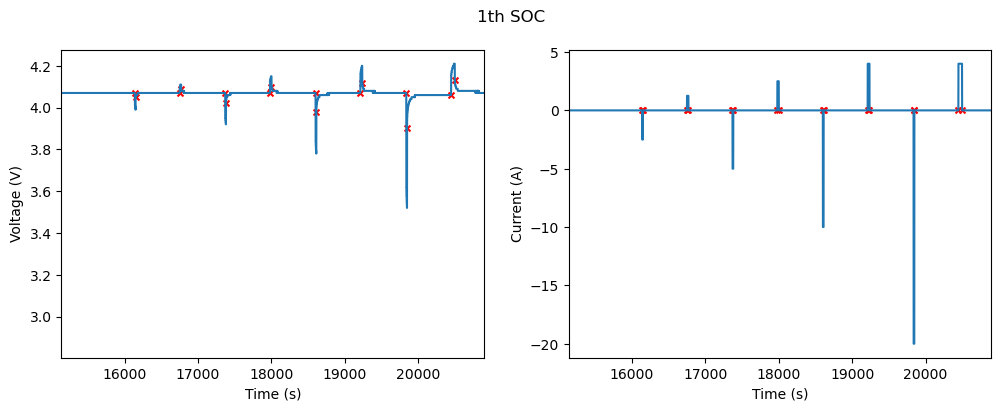

In [201]:
which_SOC_to_inspect = 1

xlim = [t[idx_pulse_start[which_SOC_to_inspect-1, 0] - 1000], t[idx_pulse_end[which_SOC_to_inspect-1, -1] + 4000]]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(t, V_actual)
axes[0].scatter(t[idx_pulse_start], V_actual[idx_pulse_start], c='r',s=18, marker='x')
axes[0].scatter(t[idx_pulse_end], V_actual[idx_pulse_end], c='r',s=18, marker='x')
axes[0].set_xlim(xlim)
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Voltage (V)')

axes[1].plot(t, I)
axes[1].scatter(t[idx_pulse_start], I[idx_pulse_start], c='r',s=18, marker='x')
axes[1].scatter(t[idx_pulse_end], I[idx_pulse_end], c='r',s=18, marker='x')
axes[1].set_xlim(xlim)
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Current (A)')

fig.suptitle('{}th SOC'.format(which_SOC_to_inspect))
plt.show()

Zoom in:

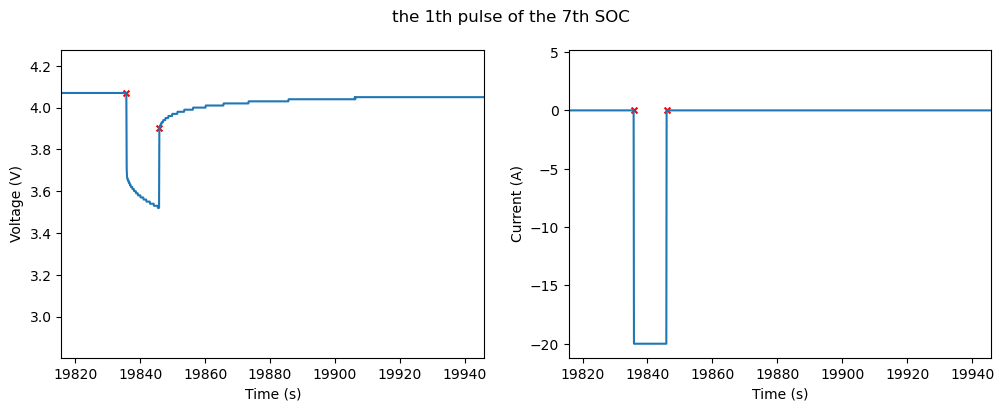

In [205]:
which_SOC_to_inspect = 1
which_pulse_to_inspect = 7

xlim = [t[idx_pulse_start[which_SOC_to_inspect-1, which_pulse_to_inspect-1] - 200],
        t[idx_pulse_end[which_SOC_to_inspect-1, which_pulse_to_inspect-1] + 1000]]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(t, V_actual)
axes[0].scatter(t[idx_pulse_start], V_actual[idx_pulse_start], c='r',s=18, marker='x')
axes[0].scatter(t[idx_pulse_end], V_actual[idx_pulse_end], c='r',s=18, marker='x')
axes[0].set_xlim(xlim)
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Voltage (V)')

axes[1].plot(t, I)
axes[1].scatter(t[idx_pulse_start], I[idx_pulse_start], c='r',s=18, marker='x')
axes[1].scatter(t[idx_pulse_end], I[idx_pulse_end], c='r',s=18, marker='x')
axes[1].set_xlim(xlim)
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Current (A)')

fig.suptitle('the {}th pulse of the {}th SOC'.format(which_SOC_to_inspect,
                                                     which_pulse_to_inspect))
plt.show()

idx_pulse_start and idx_pulse_end identify the position where the current pulse start and finish. For the voltage, it needs some times to rest and recover to zero.

Therefore, to split the overall graph for different pulses, only idx_pulse_start is used. idx_pulse_end can be used to do parametrisation (see later).
